# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# visualizando informações do dataframe
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
sinasc_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc_1.head()

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste


In [5]:
sinasc_1.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean()

C:\Users\Dougl\AppData\Local\Temp/ipykernel_16104/40918742.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_1.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean()


,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [6]:
# PESO, SEXO, DTNASC, ESCMAE
sinasc_2 = sinasc_raw[['PESO', 'SEXO', 'DTNASC', 'ESCMAE']]
sinasc_2

,PESO,SEXO,DTNASC,ESCMAE
0,3685,Masculino,2019-02-19,8 a 11 anos
1,3055,Feminino,2019-02-21,8 a 11 anos
2,3460,Feminino,2019-02-25,8 a 11 anos
3,2982,Feminino,2019-03-20,12 anos ou mais
4,3310,Feminino,2019-03-23,8 a 11 anos
...,...,...,...,...
27023,2110,Masculino,2019-12-13,12 anos ou mais
27024,3310,Masculino,2019-10-04,8 a 11 anos
27025,3065,Masculino,2019-08-02,8 a 11 anos
27026,2352,Masculino,2019-12-23,8 a 11 anos


In [7]:
aniversario = '2019-03-08'

In [8]:
sinasc_2[sinasc_2['DTNASC'] == aniversario].groupby(['DTNASC', 'ESCMAE', 'SEXO']).agg('mean')

PESO
DTNASC     ESCMAE          SEXO                  
2019-03-08 12 anos ou mais Feminino   3309.375000
                           Masculino  3354.500000
           4 a 7 anos      Feminino   3451.333333
                           Masculino  3538.333333
           8 a 11 anos     Feminino   2859.642857
                           Masculino  3458.208333

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [9]:
sinasc_3 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_3.head()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


In [10]:
#removendo o 'Município ignorado - RO'
sinasc_3 = sinasc_3.drop(sinasc_3[sinasc_3['munResNome']=='Município ignorado - RO'].index)
sinasc_3.head()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


In [11]:
# Qual o municipio que nasceu menos bebe em 2019?

sinasc_3['munResNome'].value_counts().sort_values(ascending = True).head(1).to_frame()

,munResNome
Castanheiras,32


In [12]:
# qual a idade media, maxima, minima das maes e pais nesse municipio?

sinasc_3[sinasc_3['munResNome'] == 'Castanheiras'].groupby('munResNome').agg([('média', 'mean'), ('máximo','max'), ('mínimo','min')])

IDADEMAE                 IDADEPAI              
                 média máximo mínimo      média máximo mínimo
munResNome                                                   
Castanheiras  27.28125     39     17  30.392857   43.0   17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [13]:
sinasc_4 = sinasc_raw[['munResNome','QTDFILVIVO','IDADEMAE','IDADEPAI','DTNASC']]
sinasc_4.head()

,munResNome,QTDFILVIVO,IDADEMAE,IDADEPAI,DTNASC
0,Alta Floresta D'Oeste,0.0,19,26.0,2019-02-19
1,Alta Floresta D'Oeste,1.0,29,24.0,2019-02-21
2,Alta Floresta D'Oeste,2.0,37,32.0,2019-02-25
3,Alto Alegre dos Parecis,0.0,30,24.0,2019-03-20
4,Alta Floresta D'Oeste,1.0,30,27.0,2019-03-23


In [14]:
#removendo o 'Município ignorado - RO'
sinasc_4 = sinasc_4.drop(sinasc_4[sinasc_4['munResNome']=='Município ignorado - RO'].index)

In [15]:
# Convertendo a coluna 'DTNASC' que está como string para datetime
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])

In [16]:
sinasc_4.head()

,munResNome,QTDFILVIVO,IDADEMAE,IDADEPAI,DTNASC
0,Alta Floresta D'Oeste,0.0,19,26.0,2019-02-19
1,Alta Floresta D'Oeste,1.0,29,24.0,2019-02-21
2,Alta Floresta D'Oeste,2.0,37,32.0,2019-02-25
3,Alto Alegre dos Parecis,0.0,30,24.0,2019-03-20
4,Alta Floresta D'Oeste,1.0,30,27.0,2019-03-23


In [17]:
sinasc_4a = sinasc_4.loc[(sinasc_4['DTNASC'] >= '2019-03-01') & (sinasc_4['DTNASC'] <= '2019-03-31')]

In [18]:
sinasc_4a['munResNome'].value_counts()

Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Machadinho D'Oeste            44
Espigão D'Oeste               44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alto Paraíso                  22
Alvorada D'Oeste              22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Seringueiras                  19
Colorado do Oeste             19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14
Vale do Pa

In [19]:
sinasc_4a[sinasc_4a['munResNome'] == 'Porto Velho'].groupby('munResNome').agg([('média','mean'),('máximo','max'), ('mínimo','min')])

QTDFILVIVO                 IDADEMAE                 IDADEPAI  \
                 média máximo mínimo      média máximo mínimo      média   
munResNome                                                                 
Porto Velho   1.295056    9.0    0.0  26.596774     44     14  34.629032   

                                                 DTNASC                        
            máximo mínimo                         média     máximo     mínimo  
munResNome                                                                     
Porto Velho   62.0   19.0 2019-03-15 20:38:42.580645120 2019-03-31 2019-03-01

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

### Insight

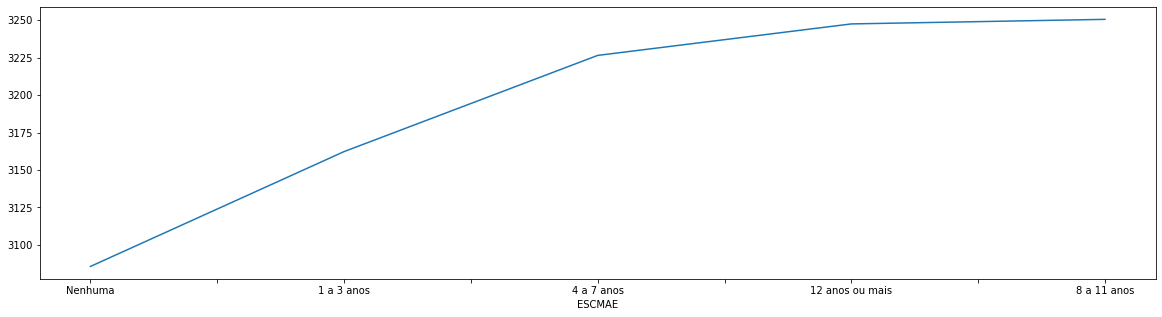

In [20]:
sinasc_raw.groupby(['ESCMAE'])['PESO'].mean().sort_values().plot(figsize=[20,5]);

- Nota-se que quanto menor o grau de escolaridade da mãe, menor é o peso de nascimento do bebê

Text(0, 0.5, 'PESO')

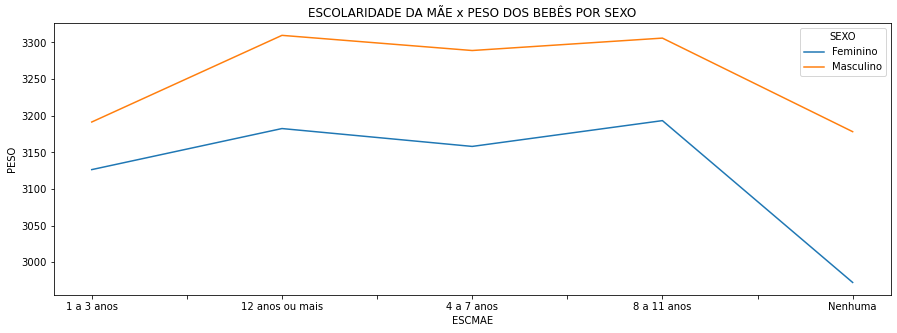

In [21]:
sinasc_raw.groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);
plt.title('ESCOLARIDADE DA MÃE x PESO DOS BEBÊS POR SEXO')
plt.ylabel('PESO')

- É possível observar que os bebês do sexo masculino nascem mais pesados que os bebês do sexo feminino

### Insight

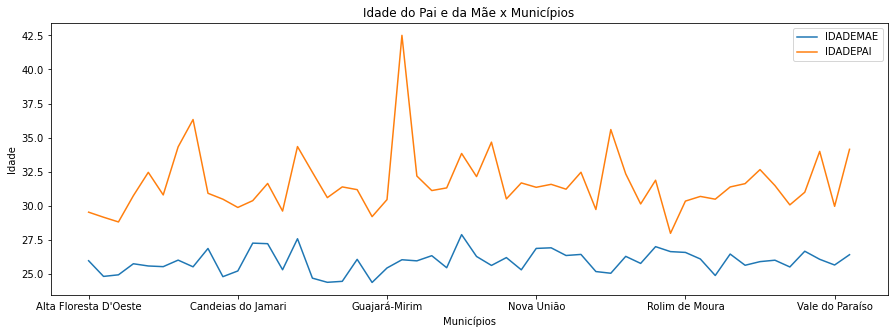

In [22]:
sinasc_3.groupby('munResNome').mean().plot(figsize=[15,5]);
plt.title('Idade do Pai e da Mãe x Municípios')
plt.ylabel('Idade')
plt.xlabel('Municípios');

- É possível notar que a idade média das mães é menor que a idade média dos pais.